# 🛣️ Análisis y Visualización de la Red Vial en Suba, Bogotá

Este script realiza un análisis y visualización de la red de vías en la localidad de **Suba, Bogotá, Colombia**, utilizando la librería [OSMnx](https://github.com/gboeing/osmnx). El cual tiene como objetivo obtener, procesar analizar y visualizar la red vial de Suba incluyendo un área de influencia, para generar un analisis de rutas optimas entre dos puntos.


## 0. Importar librerias



In [9]:
import osmnx as ox
import math
import myst_nb
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter


# 1. Descarga de información


1. **Descarga del grafo inicial**
   - Se obtiene la red de vías transitables por vehículos (`network_type="drive"`) para la zona de Suba.

2. **Generación y reproyección del polígono**
   - Se extrae la geometría de Suba como polígono.
   - Se reproyecta a un sistema métrico (`EPSG:3067`) para aplicar un **buffer de 200 metros**.
   - Luego, se transforma nuevamente a coordenadas geográficas (`EPSG:4326`) para su uso con OpenStreetMap.

3. **Descarga del grafo con mayor detalle**
   - Utilizando el polígono buffered, se descarga una red vial más completa (`network_type="all"`) que incluye todo tipo de vías (peatonales, ciclovías, etc.).

4. **Visualización sin nodos**
   - Se genera una figura de la red vial **sin mostrar nodos**, con personalización en el estilo visual (color gris, líneas delgadas y semi-transparentes).

5. **Exportación de la imagen**
   - Se guarda la visualización como imagen `.png` en alta resolución (`vias_sin_nodos_suba.png`).

6. **Visualización con nodos**
   - Finalmente, se muestra el grafo (posiblemente con nodos, aunque sin configuración explícita diferenciada).



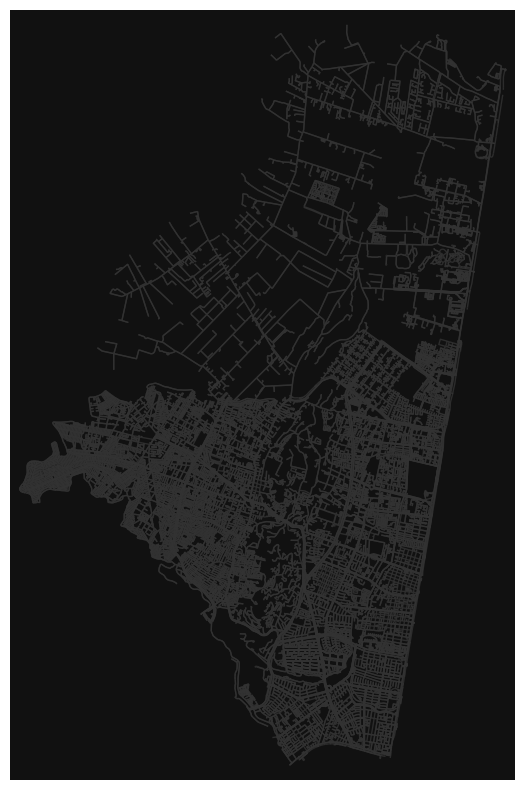

C:\Users\ricar\AppData\Local\Temp\ipykernel_23588\2199470875.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [ ]:
#Busqueda de vías en Suba, Bogotá, Colombia

PLACE_NAME = "Suba, Bogotá, Colombia"
graph_initial = ox.graph_from_place(PLACE_NAME, network_type="drive")

#Reproyecta el grafo a un sistema de coordenadas

place_polygon = ox.geocode_to_gdf(PLACE_NAME)
place_polygon = place_polygon.to_crs("EPSG:3067")
place_polygon["geometry"] = place_polygon.buffer(200)
place_polygon = place_polygon.to_crs("EPSG:4326")

# Crea un grafo de vías a partir del polígono con un buffer de 200 metros

graph = ox.graph_from_polygon(
    place_polygon.at[0, "geometry"],
    network_type="all"
)

# Visualiza el grafo de vías sin nodos
fig, ax = ox.plot_graph(
    graph,
    node_size=0,               # oculta nodos
    edge_color="#333333",      # color gris oscuro
    edge_linewidth=1.0,        # grosor de las vías
    edge_alpha=0.8,            # ligera transparencia para suavizar el visual
    figsize=(10, 10),          # tamaño de figura

)

# Guarda la figura del grafo de vías sin nodos
fig.savefig("vias_sin_nodos_suba.png", dpi=300, bbox_inches="tight")

# Visualiza el grafo de vías con nodos
fig.show()


In [3]:
# Almacena unicamente los nodos del grafo
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
edges.head()

osmid  highway  oneway reversed      length  \
u         v           key                                                     
255476400 4913735031  0     645873850  footway   False    False    8.146538   
          381991485   0    1195009265  primary    True    False   11.921676   
          11774394549 0     645873850  footway   False     True   12.706621   
259665451 5718775594  0     809284675    trunk    True    False  745.334231   
          273536445   0    1153629523    trunk    True    False  110.133567   

                          lanes                name  \
u         v           key                             
255476400 4913735031  0     NaN                 NaN   
          381991485   0       3      Transversal 60   
          11774394549 0     NaN                 NaN   
259665451 5718775594  0       3  Avenida Carrera 45   
          273536445   0       2  Avenida Carrera 45   

                                                                    geometry  \
u         v           key                                                      
255476400 4913735031  0    LINESTRING (-74.07226 4.71122, -74.07219 4.71124)   
          381991485   0    LINESTRING (-74.07226 4.71122, -74.07224 4.71112)   
          11774394549 0    LINESTRING (-74.07226 4.71122, -74.07231 4.711...   
259665451 5718775594  0    LINESTRING (-74.04663 4.75285, -74.04657 4.752...   
          273536445   0    LINESTRING (-74.04663 4.75285, -74.04663 4.752...   

                          maxspeed  ref service access bridge junction width  \
u         v           key                                                      
255476400 4913735031  0        NaN  NaN     NaN    NaN    NaN      NaN   NaN   
          381991485   0        NaN  NaN     NaN    NaN    NaN      NaN   NaN   
          11774394549 0        NaN  NaN     NaN    NaN    NaN      NaN   NaN   
259665451 5718775594  0         50  NaN     NaN    NaN    NaN      NaN   NaN   
          273536445   0         60  NaN     NaN    NaN    NaN      NaN   NaN   

                          area tunnel  
u         v           key              
255476400 4913735031  0    NaN    NaN  
          381991485   0    NaN    NaN  
          11774394549 0    NaN    NaN  
259665451 5718775594  0    NaN    NaN  
          273536445   0    NaN    NaN

In [4]:
# Cuenta la cantidad de vías por tipo de carretera
edges["highway"].value_counts()

highway
residential                         20584
footway                             19040
service                             14758
tertiary                             3934
cycleway                             2376
secondary                            1483
primary                              1048
[footway, residential]                566
trunk                                 446
path                                  344
unclassified                          156
primary_link                          149
corridor                              124
trunk_link                            117
[footway, corridor]                    94
pedestrian                             93
[service, footway]                     90
[footway, service]                     88
steps                                  84
[footway, steps]                       80
[service, residential]                 70
track                                  48
[footway, cycleway]                    22
[residential, steps]      

In [5]:
# Reproyecta el grafo a un sistema de coordenadas 
graph = ox.project_graph(graph) 

# Extrae los nodos reproyectados
nodes, edges = ox.graph_to_gdfs(graph)

nodes.crs

<Projected CRS: EPSG:32618>
Name: WGS 84 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Canada - Nunavut; Ontario; Quebec. Colombia. Cuba. Ecuador. Greenland. Haiti. Jamaica. Panama. Turks and Caicos Islands. United States (USA). Venezuela.
- bounds: (-78.0, 0.0, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 2. Análisis de las propiedades de la red

Ahora que se tiene una red apto para el _routing_, se procede a realizar funciones analíticas que ofrece OSMnx y extraer información relevante sobre la red. Para calcular estas caracteristicas se puede utilizar la función osmnx.basic_stats()

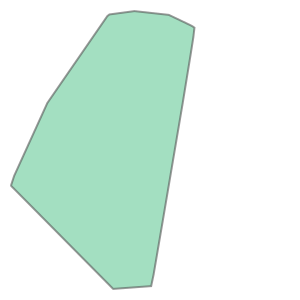

In [6]:
#Genera un polígono convex a partir de las vías del grafo
convex_hull = edges.geometry.union_all().convex_hull
convex_hull

In [7]:
stats = ox.basic_stats(graph, area=convex_hull.area)
stats

{'n': 25254,
 'm': 65882,
 'k_avg': 5.217549695097806,
 'edge_length_total': 3468065.8048665356,
 'edge_length_avg': 52.640566541187816,
 'streets_per_node_avg': 2.8508751088936406,
 'streets_per_node_counts': {0: 0,
  1: 4659,
  2: 39,
  3: 15048,
  4: 5434,
  5: 65,
  6: 9},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1844856260394393,
  2: 0.0015443098123069613,
  3: 0.5958660014255167,
  4: 0.21517383384810326,
  5: 0.0025738496871782687,
  6: 0.0003563791874554526},
 'intersection_count': 20595,
 'street_length_total': 1915511.9232545989,
 'street_segment_count': 35925,
 'street_length_avg': 53.319747341812075,
 'circuity_avg': 1.06428114342133,
 'self_loop_proportion': 0.003312456506610995,
 'node_density_km': 227.96386175104135,
 'intersection_density_km': 185.9078060015323,
 'edge_density_km': 31305.681226107106,
 'street_density_km': 17291.023016365038}

### 📊 Estadísticas Básicas de la Red Vial en Suba, Bogotá

Utilizando la función `ox.basic_stats()` de la librería OSMnx, se calcularon una serie de métricas que describen cuantitativamente la estructura de la red vial obtenida para Suba, Bogotá. A continuación se explican cada uno de los indicadores generados:

#### 🔢 Estructura del Grafo

- **`n` (nodos):** `25,254`    Número total de nodos (intersecciones y puntos finales) en la red.

- **`m` (aristas):** `65,882`  Número total de aristas (segmentos de vía) en el grafo.

- **`k_avg` (grado promedio):** `5.22`  Promedio de conexiones (aristas) por nodo, útil para entender la conectividad general.


#### 🛣️ Longitudes de las Vías

- **`edge_length_total`:** `3,468,065.80 m`  Longitud total de todas las aristas (vías) en metros.

- **`edge_length_avg`:** `52.64 m`  Longitud promedio por segmento de vía.


#### 🔗 Intersecciones y Conectividad

- **`streets_per_node_avg`:** `2.85`  Promedio de calles que se conectan por nodo.
- **`intersection_count`:** `20,595`   Número total de intersecciones en la red.

<div style="display: flex; justify-content: center; gap: 40px;">

  <table>
    <caption><strong>streets_per_node_counts</strong></caption>
    <tr><th>Número de calles</th><th>Cantidad de nodos</th></tr>
    <tr><td>1</td><td>4,659</td></tr>
    <tr><td>2</td><td>39</td></tr>
    <tr><td>3</td><td>15,048</td></tr>
    <tr><td>4</td><td>5,434</td></tr>
    <tr><td>5</td><td>65</td></tr>
    <tr><td>6</td><td>9</td></tr>
  </table>

  <table>
    <caption><strong>streets_per_node_proportions</strong></caption>
    <tr><th>Número de calles</th><th>Proporción (%)</th></tr>
    <tr><td>1</td><td>18.45%</td></tr>
    <tr><td>2</td><td>0.15%</td></tr>
    <tr><td>3</td><td>59.59%</td></tr>
    <tr><td>4</td><td>21.52%</td></tr>
    <tr><td>5</td><td>0.26%</td></tr>
    <tr><td>6</td><td>0.04%</td></tr>
  </table>

</div>


#### 🧱 Segmentos y Densidad

- **`street_segment_count`:** `35,925` Número total de segmentos de calle únicos (no dirigidos).

- **`street_length_total`:** `1,915,511.92 m`  Longitud total de calles sin considerar la dirección.

- **`street_length_avg`:** `53.32 m`   Longitud promedio por segmento de calle.


#### 📏 Densidades Espaciales (por km²)

- **`node_density_km`:** `227.96 nodos/km²`  
- **`intersection_density_km`:** `185.91 intersecciones/km²`  
- **`edge_density_km`:** `31,305.68 m de vías/km²`  
- **`street_density_km`:** `17,291.02 m de calles/km²`  


In [9]:
myst_nb.glue("node_density_km", round(stats["node_density_km"], 1))
myst_nb.glue("edge_length_total", math.floor(stats["edge_length_total"] / 1000))

228.0

3468

# 3. Visualización de Red Vial y Categorías de `highway` Más Frecuentes

Se visualiza el grafo de la red vial junto a un gráfico de barras que presenta las **5 categorías más frecuentes** del atributo `highway`, utilizando los **mismos colores** en ambas visualizaciones para mantener la coherencia visual.


## 🔧 Pasos principales

### 1. 📥 Extraer las categorías `highway`
Se recorren todas las aristas del grafo y se recopilan los valores del atributo `highway`, que representa el tipo de vía (por ejemplo: `residential`, `primary`, `secondary`, etc.).

### 2. 📊 Contar las categorías más frecuentes
Se contabiliza la frecuencia de cada tipo de `highway` y se seleccionan las **5 categorías más comunes**.

### 3. 🎨 Asignar colores a cada categoría
A cada una de las 5 categorías seleccionadas se le asigna un color específico que se usará tanto en el grafo como en el gráfico de barras.

### 4. 🗺️ Graficar el grafo
Se visualiza la red vial usando OSMnx, donde las **aristas (vías)** se colorean según su categoría `highway`.

### 5. 📈 Graficar el gráfico de barras
Se crea un gráfico de barras para mostrar las frecuencias de las 5 categorías principales, utilizando los **mismos colores** definidos en la visualización de la red.



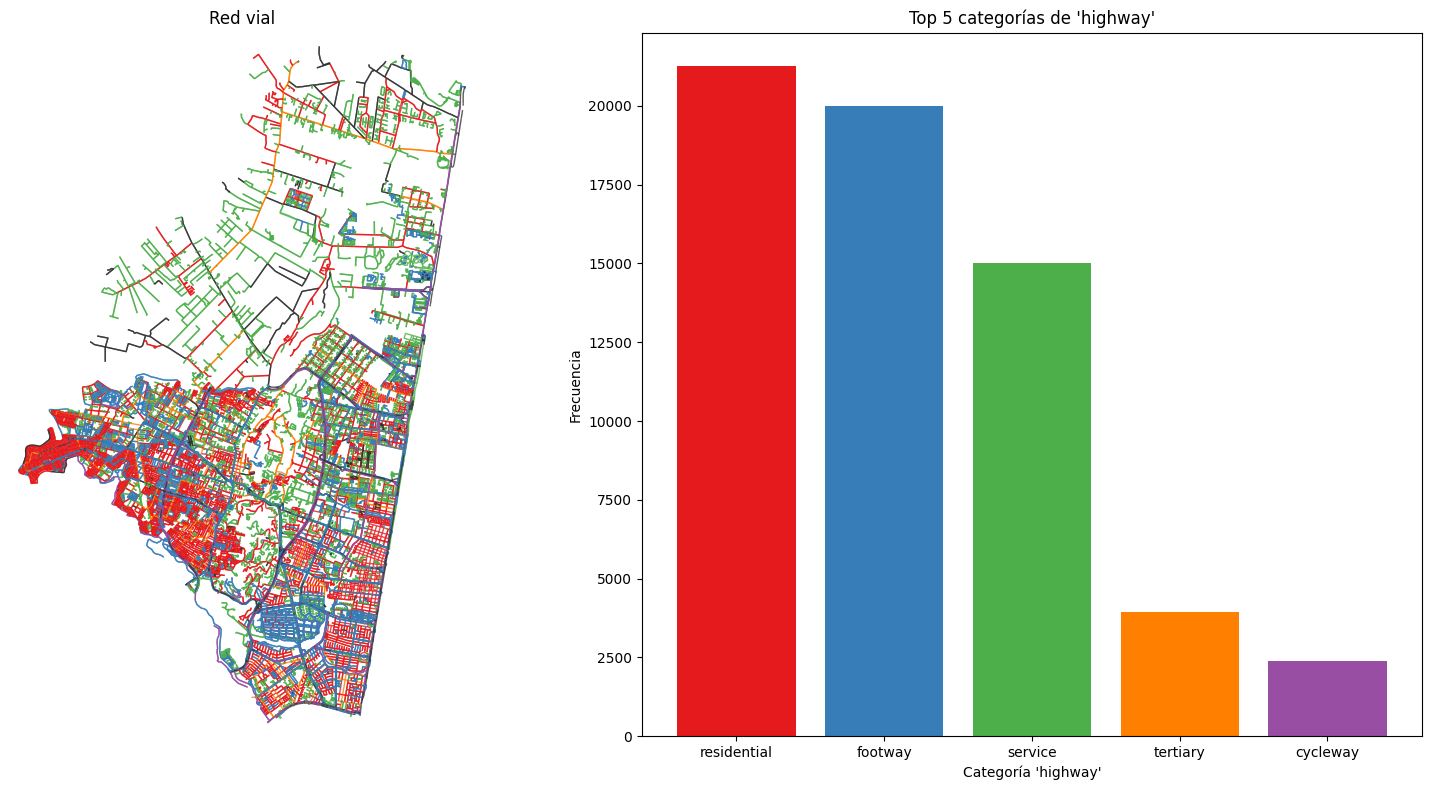

In [ ]:

# Extraer el atributo 'highway' de las aristas
highways = []
for u, v, k, data in graph.edges(keys=True, data=True):
    hw = data.get('highway')
    if isinstance(hw, list):
        highways.extend(hw)
    elif hw:
        highways.append(hw)

# Contar las 5 categorías más frecuentes
counter = Counter(highways)
top5 = counter.most_common(5)
categories, counts = zip(*top5)

# Asignar colores a las categorías (puedes personalizar estos colores)
color_map = {
    categories[0]: "#e41a1c",
    categories[1]: "#377eb8",
    categories[2]: "#4daf4a",
    categories[3]: "#ff7f00",
    categories[4]: "#984ea3",
}

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Graficar el grafo, coloreando las aristas según la categoría
edge_colors = []
for u, v, k, data in graph.edges(keys=True, data=True):
    hw = data.get('highway')
    if isinstance(hw, list):
        hw = hw[0]
    color = color_map.get(hw, "#333333")
    edge_colors.append(color)

ox.plot_graph(
    graph,
    ax=ax1,
    node_size=0,
    edge_color=edge_colors,
    edge_linewidth=1.0,
    edge_alpha=0.8,
    show=False,
    close=False
)

ax1.set_title("Red vial")

# Graficar barras
bars = ax2.bar(categories, counts, color=[color_map[c] for c in categories])
ax2.set_title("Top 5 categorías de 'highway'")
ax2.set_ylabel("Frecuencia")
ax2.set_xlabel("Categoría 'highway'")

plt.tight_layout()
plt.show()

# Diseño de rutas optima

In [10]:
origin = (
    ox.geocode_to_gdf("Portal suba, bogota")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    ox.geocode_to_gdf("Clinica la colina, bogota")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

In [11]:
origin_node_id = ox.nearest_nodes(graph, origin.x, origin.y)
origin_node_id

12844382887

In [12]:
destination_node_id = ox.nearest_nodes(graph, destination.x, destination.y)
destination_node_id

9735691677

Comparar resultados de los algoritmos

(<Figure size 800x800 with 1 Axes>, <Axes: >)

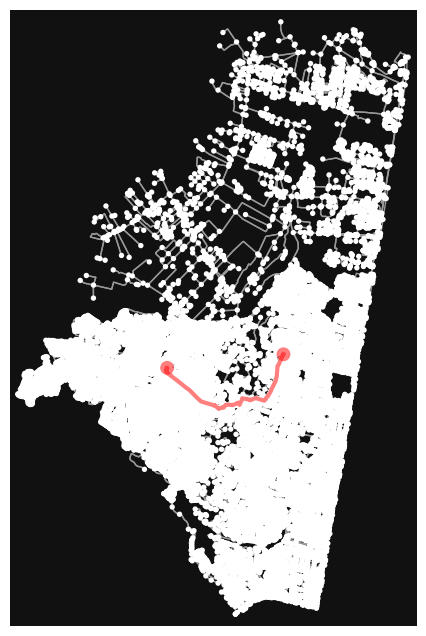

In [13]:
# Ruta con Dijkstra
route_dijkstra = nx.shortest_path(graph, origin_node_id, destination_node_id, weight="length", method="dijkstra")

# Graficar 
fig, ax = ox.plot_graph(graph, show=False, close=False)
ox.plot_graph_route(graph, route_dijkstra, route_color='red', ax=ax, route_linewidth=3, orig_dest_node_color='green', show=False, close=False)


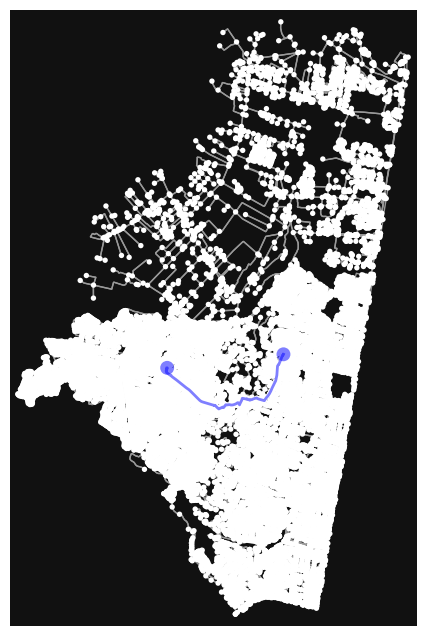

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [14]:
# Ruta con A*
route_astar = nx.astar_path(graph, origin_node_id, destination_node_id, weight="length")
# Graficar ambas rutas
fig, ax = ox.plot_graph(graph, show=False, close=False)
ox.plot_graph_route(graph, route_astar, route_color='blue', ax=ax, route_linewidth=2, orig_dest_node_color='orange', show=True, close=True)


In [15]:
diferentes = [x for x in route_dijkstra if x not in route_astar] + [x for x in route_astar if x not in route_dijkstra]
print(diferentes)  

[]


### Comparación de Resultados: Dijkstra vs A*

Una vez analizada la lista de resultados, se concluye que **no hay diferencias en las rutas calculadas** para esta red entre los algoritmos de Dijkstra y A*. Ambos producen el mismo camino óptimo.

No obstante, en términos computacionales, se observa una **ligera ventaja en el tiempo de ejecución del algoritmo A***, el cual fue aproximadamente un **6% más rápido** que Dijkstra en este caso específico.


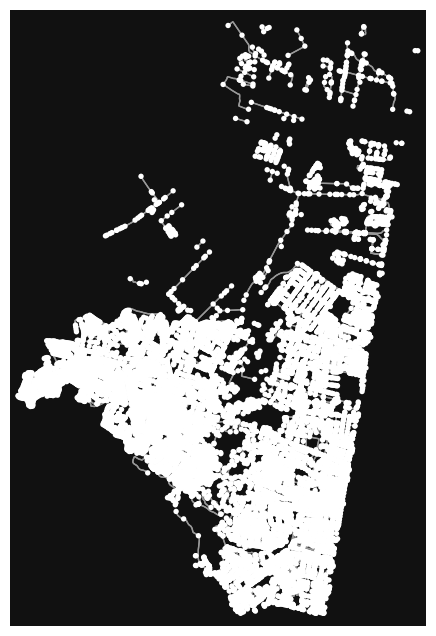

In [16]:
PLACE_NAME = "Suba, Bogotá, Colombia"
graph2 = ox.graph_from_place(
    PLACE_NAME,
    network_type="drive"
)

# Get the area of interest polygon
place_polygon = ox.geocode_to_gdf(PLACE_NAME)
place_polygon = place_polygon.to_crs("EPSG:3067")
place_polygon["geometry"] = place_polygon.buffer(200)
place_polygon = place_polygon.to_crs("EPSG:4326")

# Retrieve the network graph
graph2 = ox.graph_from_polygon(
    place_polygon.at[0, "geometry"],
    network_type="all"
)

# Convert graph edges to GeoDataFrame
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)


edges_selected = edges[edges['highway'].isin(['residential', 'footway'])]

# Crear subgrafo solo con esos edges
edges_selected = nx.edge_subgraph(graph, edges_selected.index).copy()

# Graficar solo las vías 'primary'
fig, ax = ox.plot_graph(edges_selected)

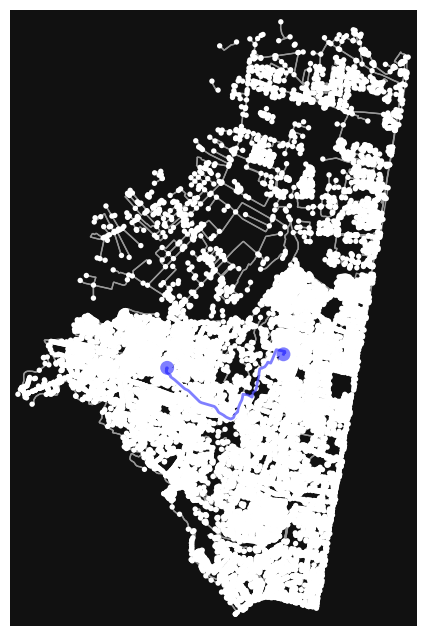

In [17]:
# Filtrar solo edges donde highway sea 'primary', 'secondary' o 'residential'
edges_selected = edges[~edges['highway'].isin(['secondary', 'residential'])]

# Crear subgrafo solo con esos edges
graph_selected = nx.edge_subgraph(graph, edges_selected.index).copy()

# Obtener nodos del subgrafo
nodes_selected = list(graph_selected.nodes)

# Buscar el nodo más cercano en el subgrafo filtrado
origin_node_id = ox.nearest_nodes(graph_selected, origin.x, origin.y)
destination_node_id = ox.nearest_nodes(graph_selected, destination.x, destination.y)

# Verificar si ambos nodos están en el mismo componente conexo
if nx.has_path(graph_selected, origin_node_id, destination_node_id):
    # Calcular la ruta en el subgrafo filtrado
    route_dijkstra2 = nx.shortest_path(graph_selected, origin_node_id, destination_node_id, weight="length", method="dijkstra")
    # Graficar la ruta sobre el subgrafo filtrado
    fig, ax = ox.plot_graph(graph_selected, show=False, close=False)
    ox.plot_graph_route(graph_selected, route_dijkstra2, route_color='blue', ax=ax, route_linewidth=2, orig_dest_node_color='orange', show=True, close=True)
else:
    print("No existe un camino entre origen y destino en el subgrafo filtrado.")

In [22]:
route_nodes = nodes.loc[route_dijkstra2]
route_nodes

,y,x,highway,street_count,geometry
osmid,,,,,
12844382887,524737.349094,600417.771867,NaN,3,POINT (600417.772 524737.349)
12844382885,524719.868443,600424.349499,NaN,4,POINT (600424.349 524719.868)
9851261791,524712.466983,600394.735165,NaN,3,POINT (600394.735 524712.467)
12844382876,524693.734141,600399.051869,NaN,3,POINT (600399.052 524693.734)
9851261793,524660.135954,600389.391182,NaN,3,POINT (600389.391 524660.136)
...,...,...,...,...,...
9735691691,525151.051935,603665.253100,NaN,3,POINT (603665.253 525151.052)
9735691693,525148.982801,603647.554641,NaN,3,POINT (603647.555 525148.983)
9735691687,525150.555757,603641.674280,NaN,3,POINT (603641.674 525150.556)


In [25]:
import shapely.geometry

# Obtener las geometrías de los nodos de la ruta
route_nodes = nodes.loc[route_dijkstra2]
route_line = shapely.geometry.LineString(route_nodes.geometry.values)

In [26]:
import geopandas

route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route_dijkstra2],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom["length_m"] = route_geom.length

route_geom.head()

,geometry,osm_nodes,length_m
0,"LINESTRING (600417.772 524737.349, 600424.349 ...","[12844382887, 12844382885, 9851261791, 1284438...",5400.677611


In [27]:
buildings = osmnx.features_from_place(
    PLACE_NAME,
    {
        "building" : True
    }
).to_crs(edges.crs)

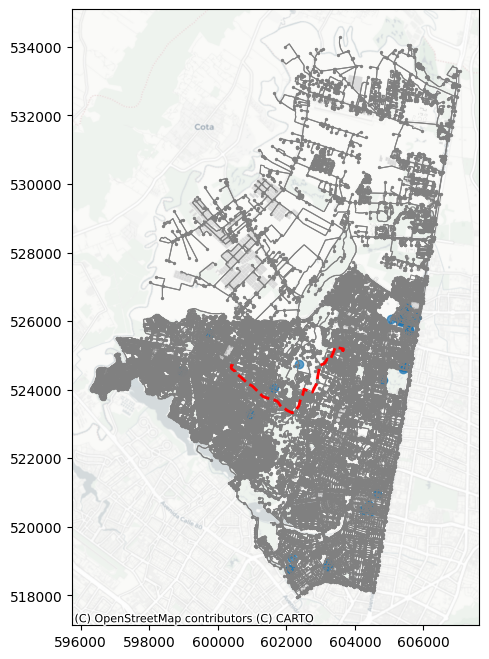

In [28]:
import contextily
import matplotlib.pyplot

fig, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot edges and nodes
edges.plot(ax=ax, linewidth=0.75, color='gray')
nodes.plot(ax=ax, markersize=2, color='gray')

# Add buildings
ax = buildings.plot(ax=ax, facecolor='lightgray', alpha=0.7)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add basemap
contextily.add_basemap(ax, crs=buildings.crs, source=contextily.providers.CartoDB.Positron)

In [29]:
edges.head()

osmid  highway  oneway reversed     length  \
u          v           key                                                    
255476400  4913735031  0     645873850  footway   False    False   8.146538   
           381991485   0    1195009265  primary    True    False  11.921676   
           11774394549 0     645873850  footway   False     True  12.706621   
4913735031 4069368783  0     584488049  service    True    False  12.431178   
           255476400   0     645873850  footway   False     True   8.146538   

                           lanes            name  \
u          v           key                         
255476400  4913735031  0     NaN             NaN   
           381991485   0       3  Transversal 60   
           11774394549 0     NaN             NaN   
4913735031 4069368783  0     NaN    TransMilenio   
           255476400   0     NaN             NaN   

                                                                     geometry  \
u          v           key                                                      
255476400  4913735031  0    LINESTRING (602891.74 520811.6, 602899.679 520...   
           381991485   0    LINESTRING (602891.74 520811.6, 602894.273 520...   
           11774394549 0    LINESTRING (602891.74 520811.6, 602886.484 520...   
4913735031 4069368783  0    LINESTRING (602899.679 520813.446, 602902.257 ...   
           255476400   0    LINESTRING (602899.679 520813.446, 602891.74 5...   

                           access maxspeed  ref service bridge junction width  \
u          v           key                                                      
255476400  4913735031  0      NaN      NaN  NaN     NaN    NaN      NaN   NaN   
           381991485   0      NaN      NaN  NaN     NaN    NaN      NaN   NaN   
           11774394549 0      NaN      NaN  NaN     NaN    NaN      NaN   NaN   
4913735031 4069368783  0       no      NaN  NaN     NaN    NaN      NaN   NaN   
           255476400   0      NaN      NaN  NaN     NaN    NaN      NaN   NaN   

                           area tunnel  
u          v           key              
255476400  4913735031  0    NaN    NaN  
           381991485   0    NaN    NaN  
           11774394549 0    NaN    NaN  
4913735031 4069368783  0    NaN    NaN  
           255476400   0    NaN    NaN

In [ ]:
# 1. Crear un buffer de 50 m alrededor de la ruta
buffer_50m = route_geom.geometry.buffer(50).iloc[0]

# 2. Seleccionar edificios que intersectan el buffer
buildings_along_route = buildings[buildings.intersects(buffer_50m)]

# 3. Contar edificios totales y por tipo
total_buildings = buildings_along_route.shape[0]
buildings_by_tag = buildings_along_route['building'].value_counts()

print(f"Total de edificios en el corredor: {total_buildings}")
print("Conteo por tipo de edificio:")
print(buildings_by_tag)


Total de edificios en el corredor: 43
Conteo por tipo de edificio:
building
yes           33
roof           6
school         2
commercial     1
warehouse      1
Name: count, dtype: int64


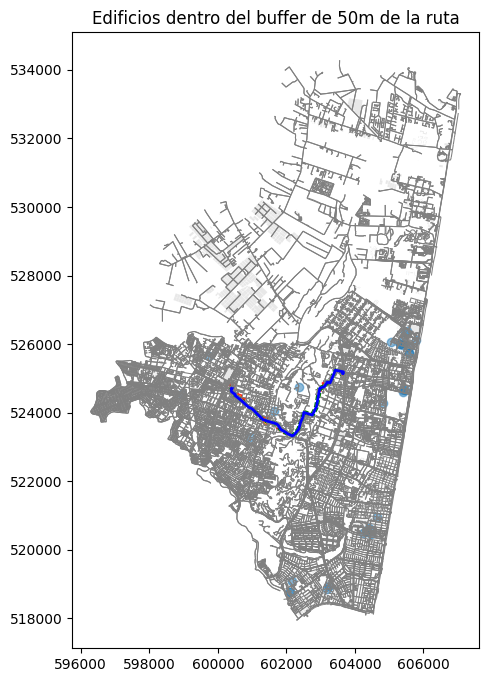

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
edges.plot(ax=ax, linewidth=0.75, color='gray')
buildings.plot(ax=ax, facecolor='lightgray', alpha=0.5)
buildings_along_route.plot(ax=ax, facecolor='orange', edgecolor='red', alpha=0.8)
route_geom.plot(ax=ax, linewidth=2, color='blue')
geopandas.GeoSeries(buffer_50m).plot(ax=ax, facecolor='none', edgecolor='green', linestyle='--')
plt.title("Edificios dentro del buffer de 50m de la ruta")
plt.show()

In [ ]:
# 4. Exportar a GeoJSON
buildings_along_route.to_file("buildings_along_route.geojson", driver="GeoJSON")